### open api로 데이터 불러오기

In [15]:
import requests
import pandas as pd

# URL과 파라미터 정의
url = "http://www.kamis.or.kr/service/price/xml.do?action=periodProductList"

params = {
    "p_cert_key": "20f546f2-715d-4524-89ae-f933d5460bb9",   # 실제 인증 키로 대체
    "p_cert_id": "dkgus731",     # 실제 요청 ID로 대체
    "p_returntype": "json",          # json 또는 xml로 설정
    "p_startday": "2003-06-01",      # 조회 시작 날짜 설정
    "p_endday": "2024-06-24",        # 조회 종료 날짜 설정
    "p_convert_kg_yn": "Y",          # kg 단위 환산 여부 (Y 또는 N)
    "p_itemcategorycode": "100",     # 부류 코드 설정
    "p_itemcode": "151",             # 품목 코드 설정
    "p_kindcode": "00",              # 품종 코드 설정
    "p_productrankcode": "04",       # 등급 코드 설정
    "p_countrycode": "",             # 지역 코드 설정
    "p_productclscode": "02"           # 구분 ( 01:소매, 02:도매, default:02 )
}

# GET 요청 보내기
response = requests.get(url, params=params)

# 요청이 성공했는지 확인
if response.status_code == 200:
    # 응답을 파싱 (json 형식일 경우)
    data = response.json()
    
    # 'item' 리스트를 데이터프레임으로 변환
    items = data.get('data', {}).get('item', [])
    df = pd.DataFrame(items)
    
    # 데이터프레임 전체 출력 설정
    pd.set_option('display.max_rows', None)   # 모든 행 출력
    pd.set_option('display.max_columns', None) # 모든 열 출력
    pd.set_option('display.width', None)      # 가로 너비 설정 없음
    pd.set_option('display.max_colwidth', None) # 컬럼 최대 너비 설정 없음
    
    # 데이터프레임 출력
    print(df)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

     itemname kindname countyname marketname  yyyy regday  price
0          []       []         평균         []  2023  08/14  4,370
1          []       []         평균         []  2023  08/16  4,264
2          []       []         평균         []  2023  08/17  4,136
3          []       []         평균         []  2023  08/18  4,094
4          []       []         평균         []  2023  08/21  4,020
5          []       []         평균         []  2023  08/22  3,972
6          []       []         평균         []  2023  08/23  3,958
7          []       []         평균         []  2023  08/24  4,062
8          []       []         평균         []  2023  08/25  3,960
9          []       []         평균         []  2023  08/28  3,892
10         []       []         평균         []  2023  08/29  3,910
11         []       []         평균         []  2023  08/30  3,940
12         []       []         평균         []  2023  08/31  3,904
13         []       []         평균         []  2023  09/01  3,810
14         []       []   

In [16]:
new_df = df[df['countyname'] == '평년']

### 데이터 전처리

float 형식으로 바꾸기 위해 ',' 없애고 type 변경

In [17]:
new_df['price'] = new_df['price'].str.replace(',', '').astype(float)

C:\Users\CAU\AppData\Local\Temp\ipykernel_16528\4172125139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df['price'].str.replace(',', '').astype(float)


In [18]:
import pandas as pd

# regday 열에서 '/' 지우기
new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)

C:\Users\CAU\AppData\Local\Temp\ipykernel_16528\1408818617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)


In [19]:
# yyyy와 regday 열을 합쳐서 새로운 date 열 생성
new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
new_df['date'] = pd.to_datetime(new_df['date'])

C:\Users\CAU\AppData\Local\Temp\ipykernel_16528\247695081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
C:\Users\CAU\AppData\Local\Temp\ipykernel_16528\247695081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])


In [20]:
#기존 yyyy, regday 열 삭제
new_df = new_df.drop(['yyyy', 'regday'], axis=1)

In [7]:
new_df.head()

,itemname,kindname,countyname,marketname,price,date
209,[],[],평년,[],3852.0,2023-05-02
210,[],[],평년,[],3892.0,2023-05-03
211,[],[],평년,[],3960.0,2023-05-07
212,[],[],평년,[],3992.0,2023-05-08
213,[],[],평년,[],3990.0,2023-05-09


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 209 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   itemname    209 non-null    object        
 1   kindname    209 non-null    object        
 2   countyname  209 non-null    object        
 3   marketname  209 non-null    object        
 4   price       209 non-null    float64       
 5   date        209 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.4+ KB


In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 파일 경로 설정
fontprop = fm.FontProperties(fname=font_path, size=10)

plt.rc('font', family='NanumGothic')  # 전체 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 표시 설정 (마이너스 폰트 깨짐 방지)


Root Mean Squared Error: 65.57462103020336


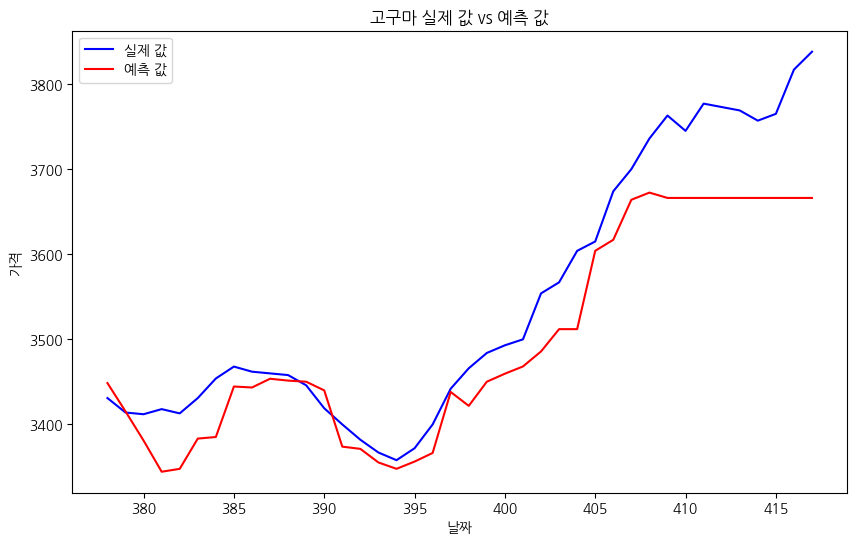

예측된 미래 값: 3666.174560546875


In [28]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# 시계열 특성 생성 (여기서는 1~3 시점 전 가격 데이터를 특성으로 사용)
new_df['lag_1'] = new_df['price'].shift(1)
new_df['lag_2'] = new_df['price'].shift(2)
new_df['lag_3'] = new_df['price'].shift(3)

# NaN 값을 포함한 행 삭제 (이동으로 인한 결측치 제거)
new_df.dropna(inplace=True)

# 입력 변수(X)와 타겟 변수(y) 정의
X = new_df[['lag_1', 'lag_2', 'lag_3']]  # 필요한 만큼의 시점 수를 조정하여 더 많은 특성을 추가할 수 있습니다.
y = new_df['price']

# 데이터 분할 (훈련 데이터와 테스트 데이터로 분리, 시계열 데이터이므로 shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 2단계: XGBoost 모델 학습

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# 3단계: 예측 수행

y_pred = model.predict(X_test)

# 모델 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# 4단계: 예측값 시각화

plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='실제 값', color='blue')
plt.plot(y_test.index, y_pred, label='예측 값', color='red')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('고구마 실제 값 vs 예측 값')
plt.legend()
plt.show()

# 5단계: 미래 값 예측
# 미래 예측을 위해 최신 데이터로부터 새로운 행 생성
future = pd.DataFrame({
    'lag_1': [new_df['price'].iloc[-1]],
    'lag_2': [new_df['price'].iloc[-2]],
    'lag_3': [new_df['price'].iloc[-3]],
})

future_pred = model.predict(future)
print(f"예측된 미래 값: {future_pred[0]}")


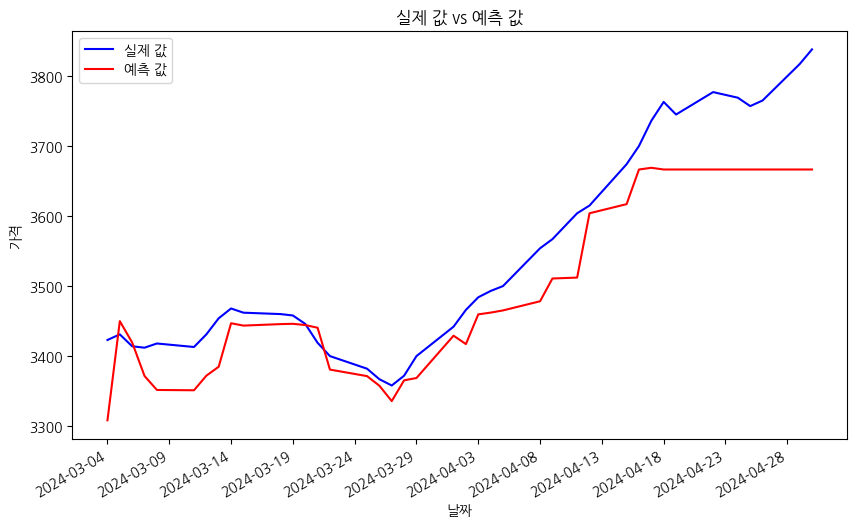

In [24]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 단계는 이전과 동일하다고 가정
# df['date']가 날짜 데이터를 포함하고 있다고 가정

# 시계열 데이터를 datetime 형식으로 변환
new_df['date'] = pd.to_datetime(new_df['date'])

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 모델 학습
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(new_df['date'].iloc[-len(y_test):], y_test.values, label='실제 값', color='blue')
plt.plot(new_df['date'].iloc[-len(y_test):], y_pred, label='예측 값', color='red')

# 날짜 형식의 X축 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # 날짜 간격 조정

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('실제 값 vs 예측 값')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 날짜 라벨 자동 회전
plt.show()


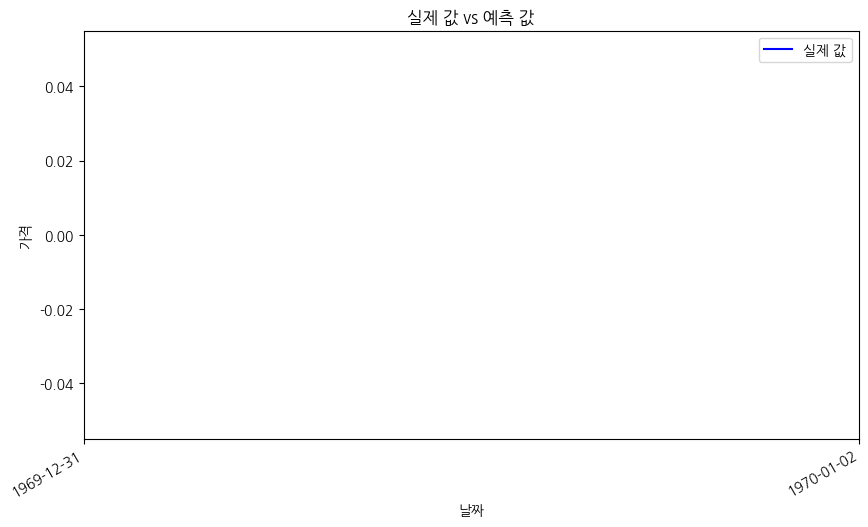

In [27]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 단계는 이전과 동일하다고 가정
# df['date']가 날짜 데이터를 포함하고 있다고 가정

# 시계열 데이터를 datetime 형식으로 변환
new_df['date'] = pd.to_datetime(new_df['date'])

# X와 y 정의 (이전과 동일)
X = new_df[['lag_1', 'lag_2', 'lag_3']]
y = new_df['price']

# 훈련/테스트 데이터 직접 분할 (전체 데이터의 20%를 테스트 데이터로 사용)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
date_test = new_df['date'][train_size:]  # 테스트용 날짜 인덱스 유지

# 모델 학습
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(date_test, y_test.values, label='실제 값', color='blue')
plt.plot(date_test, y_pred, label='예측 값', color='red')

# 날짜 형식의 X축 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # 날짜 간격 조정

plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('실제 값 vs 예측 값')
plt.legend()
plt.gcf().autofmt_xdate()  # x축 날짜 라벨 자동 회전
plt.show()


In [25]:
new_df

,itemname,kindname,countyname,marketname,price,date,lag_1,lag_2,lag_3
215,[],[],평년,[],3988.0,2023-05-13,3985.0,3990.0,3992.0
216,[],[],평년,[],3996.0,2023-05-14,3988.0,3985.0,3990.0
217,[],[],평년,[],4007.0,2023-05-16,3996.0,3988.0,3985.0
218,[],[],평년,[],4009.0,2023-05-17,4007.0,3996.0,3988.0
219,[],[],평년,[],4023.0,2023-05-20,4009.0,4007.0,3996.0
220,[],[],평년,[],4000.0,2023-05-21,4023.0,4009.0,4007.0
221,[],[],평년,[],3983.0,2023-05-22,4000.0,4023.0,4009.0
222,[],[],평년,[],3962.0,2023-05-23,3983.0,4000.0,4023.0
223,[],[],평년,[],3952.0,2023-05-24,3962.0,3983.0,4000.0
224,[],[],평년,[],3963.0,2023-05-27,3952.0,3962.0,3983.0


### 모델링

In [9]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

시계열 데이터 처리

In [10]:
# 시간 정보 처리
new_df['date'] = pd.to_datetime(new_df['date'])
new_df = new_df.set_index('date')

# 과거 가격 데이터 생성 (lag 변수)
for i in range(1, 4):
    x = new_df[f'lag_{i}'] = new_df['price'].shift(i)
    
# 훈련/테스트 데이터 분할
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

최적의 하이퍼파라미터를 찾기 위해 그리드서치 진행

In [11]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

# XGBoost 모델 생성
model = XGBRegressor(objective='reg:squarederror')

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# 학습 및 최적 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print('Best Parameters:', grid_search.best_params_)

# 테스트 데이터로 모델 평가
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
MSE: 9725.0761
MAE: 83.3430


In [12]:
# XGBoost 모델 학습
model = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

NameError: name 'r2_score' is not defined

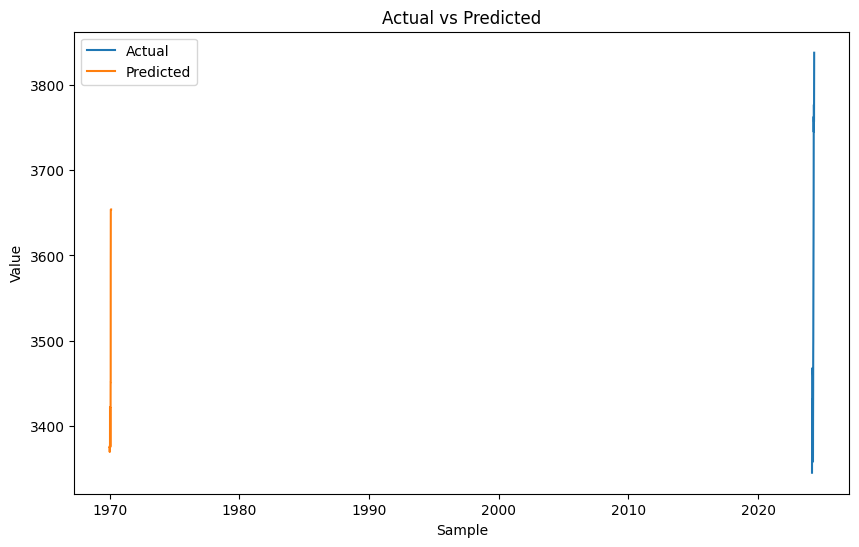

In [13]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()